### **. Artificial Neural Networks:**

In [100]:
import pandas as pd
import numpy as np

input_path = 'dataset/cleaned_train.csv'
input_csv = pd.read_csv(input_path)

train = input_csv.drop(columns='sii')
y = input_csv['sii']

train.shape, y.shape

((1491, 13), (1491,))

In [66]:
train.head()

,Basic_Demos-Age,CGAS-CGAS_Score,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_PU,FGC-FGC_SRR,BIA-BIA_DEE,SDS-SDS_Total_Raw,PreInt_EduHx-computerinternet_hoursday
0,5.0,51.0,46.0,51.0,67.0,85.0,110.0,0.00,0.0,6.00,1492.0,41.0,3.0
1,9.0,62.0,48.0,46.0,75.0,70.0,122.0,3.00,5.0,13.75,1499.0,46.0,0.0
2,9.0,71.0,56.0,82.0,60.0,97.0,117.0,22.50,5.0,7.00,1923.0,31.0,0.0
3,13.0,50.0,60.0,112.0,60.0,73.0,102.0,12.00,6.0,13.75,1996.0,40.0,0.0
4,10.0,65.0,55.0,85.0,123.0,83.0,163.0,11.25,2.0,13.75,1817.0,27.0,3.0


In [67]:
# imports:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import warnings

In [101]:
# Before the creation of the model I convert the target variable to a classification problem with 1HE encoding
target = to_categorical(y, num_classes=4)
target.shape

(1491, 4)

In [69]:
warnings.filterwarnings('ignore')

# First of all let's try with a very basic model, a netowrk composed by only the output layer:
model = Sequential([    # Sequential model is a linear stack of layers
    Dense(4, activation='softmax', input_shape=(13,))    # Dense layer is a regular deeply connected neural network layer
    # softmax activation function is used for multi-class classification problems
])


model.compile(    # compile method configures the model for training
    loss='categorical_crossentropy',    # categorical_crossentropy is a loss function used for multi-class classification
    metrics=['accuracy']    # accuracy is the metric which is used to evaluate the model
)

model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 4)              │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Evaluate the model:
train_loss, train_accuracy = model.evaluate(train, target, verbose=1)

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6223 - loss: 415.4454 
Training Loss: 426.6960
Training Accuracy: 0.6090


In [71]:
# Let's now try with more complex models:
# Let's add an hidden layer with ReLu as activation function, leaving softmax for the output layer
# Let's also change the optimizer to a smaller fixed Adam

modelv2 = Sequential()

modelv2.add(Dense(64, activation = 'relu', input_shape=(13,))) # First layer
modelv2.add(Dense(32, activation = 'relu')) # Second layer (Hidden layer)
modelv2.add(Dense(4, activation = 'softmax')) # Output layer

modelv2.compile(
    optimizer=Adam(learning_rate=0.0001), # I set the learning rate to 0.0001 (default is 0.001)
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelv2.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,108 (12.14 KB)

 Trainable params: 3,108 (12.14 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Let's evaluate the model:

train_loss, train_accuracy = modelv2.evaluate(train, target, verbose=1)

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6223 - loss: 148.4468
Training Loss: 150.9040
Training Accuracy: 0.6090


In [73]:
# That's bad, let's try with the same model but adding more epochs:

modelv3 = Sequential()

modelv3.add(Dense(64, activation = 'relu', input_shape=(13,))) # First layer
modelv3.add(Dense(32, activation = 'relu')) # Second layer (Hidden layer)
modelv3.add(Dense(4, activation = 'softmax')) # Output layer

modelv3.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelv3.summary()


history = modelv3.fit(train, target, epochs=100, batch_size=32)  # history object is used to store the training progress
                                                # the data is divided in batches of 32 samples

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,108 (12.14 KB)

 Trainable params: 3,108 (12.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2362 - loss: 104.8823
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5464 - loss: 11.9311
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5527 - loss: 4.8433
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5431 - loss: 4.8956
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5247 - loss: 4.2127
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5596 - loss: 3.9549
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5395 - loss: 3.3500
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5138 - loss: 3.1495
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4835 - loss: 2.7837
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5048 - loss: 2.6557
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4879 - loss: 2.5056
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

In [74]:
# Evaluate the model:
test_loss, test_accuracy = modelv3.evaluate(train, target, verbose=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5982 - loss: 1.0099


In [75]:
# Starting to see some improvements, let's try with more epochs, one more layer, more neurons, and even a lower learning rate:

modelv4 = Sequential()

modelv4.add(Dense(128, activation = 'relu', input_shape=(13,))) 
modelv4.add(Dense(64, activation = 'relu'))
modelv4.add(Dense(32, activation='relu'))  # Additional hidden layer
modelv4.add(Dense(4, activation = 'softmax')) 

modelv4.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelv4.summary()

history = modelv4.fit(train, target, epochs=500, batch_size=32)

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,260 (47.89 KB)

 Trainable params: 12,260 (47.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1106 - loss: 173.0605 
Epoch 2/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1532 - loss: 146.4358
Epoch 3/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1667 - loss: 121.5792
Epoch 4/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1540 - loss: 100.8472
Epoch 5/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1540 - loss: 81.9355
Epoch 6/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1495 - loss: 60.3679
Epoch 7/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1597 - loss: 39.1827
Epoch 8/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2448 - loss: 19.7415
Epoch 9/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5240 - loss: 18.1760
Epoch 10/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5247 - loss: 13.5082
Epoch 11/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5167 - loss: 13.2165
Epoch 12/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [76]:
# Evaluate the model:
test_loss, test_accuracy = modelv4.evaluate(train, target, verbose=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6514 - loss: 0.8735


In [77]:
# With the best performing model so far, let's try with scaled data: let's try with StandardScaler and MinMaxScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_standard_scaled = scaler.fit_transform(train)

In [78]:
# let's try the model with the scaled data :

#give me the code for using the modelv4
history = modelv4.fit(train_standard_scaled, target, epochs=500, batch_size=32)  # history object is used to store the training progress

Epoch 1/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1358 - loss: 1.4422
Epoch 2/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2515 - loss: 1.3855
Epoch 3/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3335 - loss: 1.3564
Epoch 4/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3816 - loss: 1.3366
Epoch 5/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4383 - loss: 1.3061
Epoch 6/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4651 - loss: 1.2993
Epoch 7/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4822 - loss: 1.2847
Epoch 8/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5068 - loss: 1.2735
Epoch 9/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5171 - loss: 1.2570
Epoch 10/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5585 - loss: 1.2381
Epoch 11/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5736 - loss: 1.2239
Epoch 12/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [79]:
# Evaluate the model:
test_loss, test_accuracy = modelv4.evaluate(train_standard_scaled, target, verbose=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6954 - loss: 0.7321


In [80]:
# Now let's try with MinMaxScaler:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_minmax_scaled = scaler.fit_transform(train)

In [81]:
history = modelv4.fit(train_minmax_scaled, target, epochs=500, batch_size=32)  # history object is used to store the training progress

Epoch 1/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6217 - loss: 1.0595
Epoch 2/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6325 - loss: 1.0247
Epoch 3/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6091 - loss: 1.0007
Epoch 4/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6095 - loss: 0.9759
Epoch 5/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6084 - loss: 0.9746
Epoch 6/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6040 - loss: 0.9461
Epoch 7/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5907 - loss: 0.9545
Epoch 8/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6169 - loss: 0.9354
Epoch 9/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6249 - loss: 0.9177
Epoch 10/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5919 - loss: 0.9482
Epoch 11/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6133 - loss: 0.9142
Epoch 12/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

In [82]:
test_loss, test_accuracy = modelv4.evaluate(train_minmax_scaled, target, verbose=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6593 - loss: 0.7775


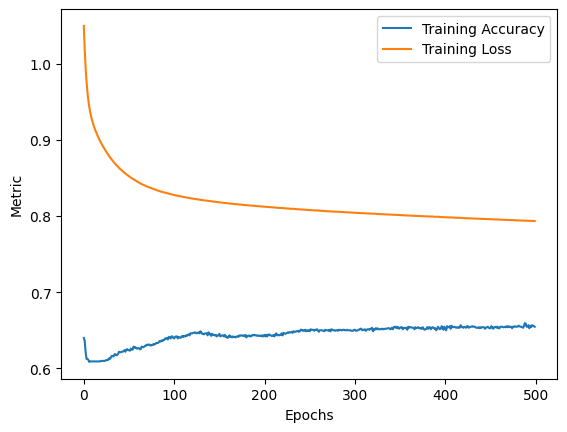

In [83]:
# So with the modelv4 we have the highest accuracy with the StandardScaler
# Are there needed more epochs? Could them improve the model?
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.legend()
plt.show()

In [84]:
# Well it seems that the model is not improving after more or less 100 epochs..
# Even if data is not hard spatially correlated, let's try with a Convolutional Neural Network:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

model_conv = Sequential()

# Assuming your input data shape is (13, 13) per sample, or (height, width, channels)
model_conv.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(13, 1)))  # 2D Conv Layer
model_conv.add(MaxPooling1D(pool_size=2))  # Max pooling to reduce spatial dimensions
model_conv.add(Flatten())  # Flatten the 2D data to 1D for dense layers
model_conv.add(Dense(32, activation='relu'))
model_conv.add(Dense(4, activation='softmax'))

model_conv.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model_conv.summary()        

                                    # -1 automatically calculates the number of samples (rows)
history = model_conv.fit(train.values.reshape(-1, 13, 1), target, epochs=200, batch_size=32)

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 11, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,660 (41.64 KB)

 Trainable params: 10,660 (41.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4108 - loss: 29.7076
Epoch 2/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5608 - loss: 3.3279
Epoch 3/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5370 - loss: 2.8622
Epoch 4/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5005 - loss: 2.2277
Epoch 5/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4729 - loss: 2.6619
Epoch 6/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4781 - loss: 1.7299
Epoch 7/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5423 - loss: 1.6412
Epoch 8/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5273 - loss: 1.6987
Epoch 9/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5682 - loss: 1.3793
Epoch 10/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5591 - loss: 1.4673
Epoch 11/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5149 - loss: 2.6910
Epoch 12/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

In [85]:
test_loss, test_accuracy = model_conv.evaluate(train, target, verbose=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6407 - loss: 0.8546


In [97]:
# Not that good in the end... let's try to evaluate the best performing model with the small test set:
test_path_data = 'dataset/test.csv'
test_path_target = 'dataset/sample_submission.csv'
test_csv = pd.read_csv(test_path_data)
test_target = pd.read_csv(test_path_target)

# remove the features in test that are not in train
test = test_csv[train.columns]
y_test = test_target.drop(columns='id')

test.shape, y_test.shape

((20, 13), (20, 1))

In [98]:
# Let's scale the test data with the StandardScaler:

scaler = StandardScaler()
test_standard_scaled = scaler.fit_transform(test)

target_test = to_categorical(y, num_classes=4)
target_test.shape

(20, 4)

In [102]:
# Evaluate the model:
history = modelv4.fit(train_standard_scaled, target, epochs=500, batch_size=32)

Epoch 1/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6468 - loss: 1.1272
Epoch 2/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6805 - loss: 0.9808
Epoch 3/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6538 - loss: 0.9860
Epoch 4/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6586 - loss: 0.9340
Epoch 5/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6730 - loss: 0.8956
Epoch 6/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6660 - loss: 0.9308
Epoch 7/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6618 - loss: 0.8790
Epoch 8/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6945 - loss: 0.7896
Epoch 9/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6767 - loss: 0.8489
Epoch 10/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6902 - loss: 0.7989
Epoch 11/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6761 - loss: 0.8576
Epoch 12/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [103]:
test_loss, test_accuracy = modelv4.evaluate(test_standard_scaled, target_test, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.3000 - loss: 1.9917
